# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("/kaggle/input/project-4/Leads.csv")

In [3]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.shape

(9240, 37)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(1943, 37)

# data cleaning

In [9]:
data = data.drop(columns=['Prospect ID', 'Lead Number', 'Lead Quality', 'What matters most to you in choosing a course', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'])

In [10]:
data['Lead Source'].unique()

array(['Direct Traffic', 'Google', 'Organic Search', 'Referral Sites',
       'Olark Chat', 'Social Media', 'Reference', 'WeLearn',
       'Press_Release'], dtype=object)

In [11]:
data['Lead Source'].fillna(data['Lead Source'].mode()[0], inplace=True)

/tmp/ipykernel_18/1469115540.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Lead Source'].fillna(data['Lead Source'].mode()[0], inplace=True)


In [12]:
data['TotalVisits'].unique()

array([ 2.,  1.,  8., 11.,  6.,  3.,  4.,  7.,  5., 13., 10., 12.,  9.,
       14., 17., 21., 15., 18., 43., 16., 20., 27., 29.,  0., 23., 24.,
       19., 42., 25.])

In [13]:
data['Page Views Per Visit'].unique()

array([ 2.  ,  1.  ,  8.  , 11.  ,  6.  ,  3.  ,  1.33,  4.  ,  1.5 ,
        3.5 ,  5.  ,  7.  , 13.  ,  5.5 ,  2.5 ,  3.33,  2.67,  1.67,
        1.8 ,  4.5 ,  2.33,  6.5 ,  4.33, 14.  ,  3.4 ,  1.75,  2.63,
       10.  , 15.  ,  2.25,  1.43,  9.  ,  3.67,  2.57,  2.75,  2.8 ,
        3.91,  3.25,  3.2 ,  2.17,  2.6 ,  2.4 ,  2.22,  1.83,  1.56,
        5.4 ,  1.6 ,  2.9 ,  0.  ,  1.25,  3.83,  1.4 ,  2.71, 12.  ,
        3.43,  2.56,  6.33,  1.64,  1.57,  1.22,  1.38,  1.54,  2.13,
        2.14,  3.75,  2.45,  2.2 ,  1.63,  4.25,  1.71,  1.17, 14.5 ,
        3.8 ,  3.82,  5.67,  1.93,  2.08,  2.83])

In [14]:
data['Last Activity'].unique()

array(['Email Opened', 'Unreachable', 'Converted to Lead',
       'Email Link Clicked', 'Page Visited on Website',
       'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'Email Bounced',
       'Olark Chat Conversation', 'SMS Sent',
       'Visited Booth in Tradeshow', 'Approached upfront',
       'Email Received', 'Email Marked Spam'], dtype=object)

In [15]:
data['Specialization'].unique()

array(['Business Administration', 'Media and Advertising', 'Select',
       'Supply Chain Management', 'Travel and Tourism',
       'Marketing Management', 'Banking, Investment And Insurance',
       'Finance Management', 'International Business',
       'Human Resource Management', 'E-COMMERCE', 'Operations Management',
       'Retail Management', 'IT Projects Management',
       'Services Excellence', 'Hospitality Management', 'E-Business',
       'Healthcare Management', 'Rural and Agribusiness'], dtype=object)

In [16]:
data['Country'].unique()

array(['India', 'United Arab Emirates', 'United States', 'Bahrain',
       'United Kingdom', 'Qatar', 'Australia', 'Ghana', 'Singapore',
       'Saudi Arabia', 'Kuwait', 'France', 'Netherlands', 'Sweden',
       'Germany', 'Hong Kong', 'Italy', 'Denmark', 'Canada', 'Indonesia',
       'South Africa', 'China', 'Bangladesh'], dtype=object)

In [17]:
data['Tags'].unique()

array(['Will revert after reading the email', 'Ringing',
       'Interested in other courses',
       'In confusion whether part time or DLP', 'Busy',
       'Already a student', 'Diploma holder (Not Eligible)',
       'Graduation in progress', 'switched off', 'Lost to EINS',
       'number not provided', 'invalid number',
       'Interested  in full time MBA', 'Closed by Horizzon',
       'Not doing further education', 'wrong number given', 'opp hangup',
       'Still Thinking', 'in touch with EINS', 'Lost to Others',
       'Want to take admission but has financial problems',
       'Interested in Next batch', 'Lateral student'], dtype=object)

In [18]:
data['City'].unique()

array(['Mumbai', 'Other Metro Cities', 'Select', 'Other Cities',
       'Thane & Outskirts', 'Other Cities of Maharashtra',
       'Tier II Cities'], dtype=object)

In [19]:
data = data.drop(columns=['Lead Profile', 'What is your current occupation', 'How did you hear about X Education'])

In [20]:
data.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Specialization                              0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                                        0
Update me on Supply Chain Content           0
Get updates on DM Content         

In [21]:
inp=data.copy()

In [22]:
inp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [23]:
inp1=pd.get_dummies(inp)

In [24]:
inp1.shape

(1943, 137)

# EDA

In [25]:
data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,1943.000000,1943.000000,1943.000000,1943.000000
mean,0.536284,4.759650,731.020072,3.198451
std,0.498810,3.719071,560.086966,1.862994
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,213.000000,2.000000
50%,1.000000,4.000000,640.000000,3.000000
75%,1.000000,6.000000,1210.500000,4.000000
max,1.000000,43.000000,2253.000000,15.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


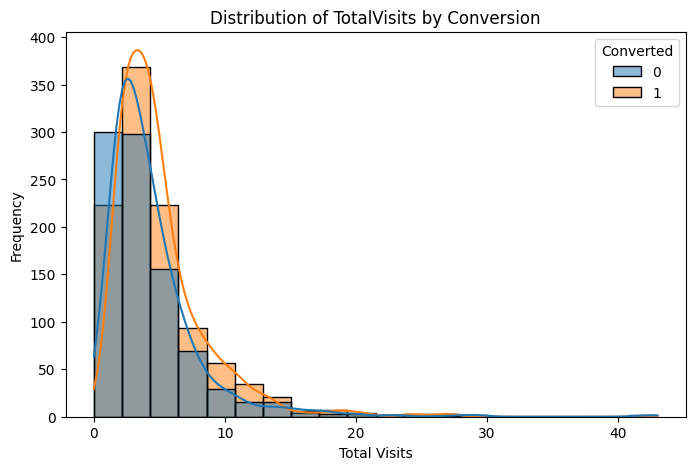

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='TotalVisits', bins=20, kde=True, hue='Converted')
plt.title('Distribution of TotalVisits by Conversion')
plt.xlabel('Total Visits')
plt.ylabel('Frequency')
plt.show()

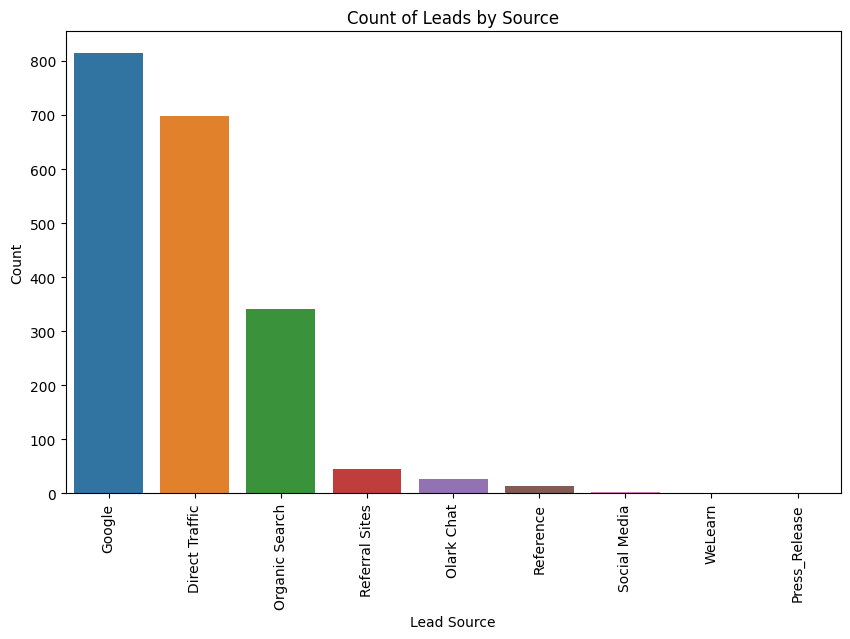

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Lead Source', order=data['Lead Source'].value_counts().index)
plt.title('Count of Leads by Source')
plt.xticks(rotation=90)
plt.xlabel('Lead Source')
plt.ylabel('Count')
plt.show()

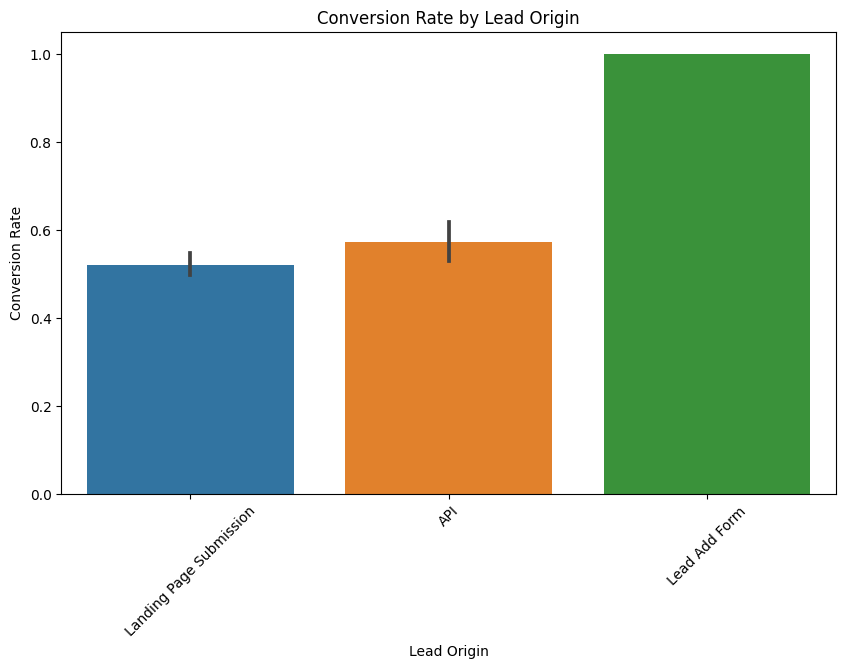

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Lead Origin', y='Converted')
plt.title('Conversion Rate by Lead Origin')
plt.xticks(rotation=45)
plt.xlabel('Lead Origin')
plt.ylabel('Conversion Rate')
plt.show()

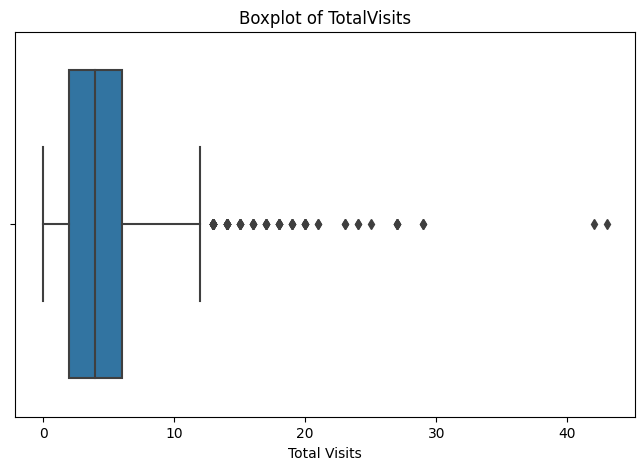

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='TotalVisits')
plt.title('Boxplot of TotalVisits')
plt.xlabel('Total Visits')
plt.show()

# LINEAR REGRESSION 

In [30]:
y = inp1.pop('Converted')
x = inp1

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=41)

# apply linear regression 

In [32]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [33]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred=linear_reg.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("MSE=",mean_squared_error(y_test,y_pred))
print("R2 score=",r2_score(y_test,y_pred))

MSE= 0.04518286473775178
R2 score= 0.8186876185023646
